In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
start_date = "2024-11-01"
end_date = "2025-4-24"

In [3]:
import yfinance as yf

In [4]:
data = yf.download("SUZLON.NS", start = start_date, end = end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS
Date,,,,,
2024-11-01,68.139999,68.400002,67.199997,67.300003,14965199
2024-11-04,66.320000,68.239998,65.199997,68.190002,55381082
2024-11-05,67.370003,68.250000,65.529999,66.300003,45626050
2024-11-06,69.320000,69.849998,67.419998,68.000000,50008246
2024-11-07,66.800003,69.449997,66.440002,69.449997,49354800
...,...,...,...,...,...
2025-04-16,54.340000,54.889999,53.849998,54.509998,34690956
2025-04-17,55.070000,55.720001,54.009998,54.330002,54279879


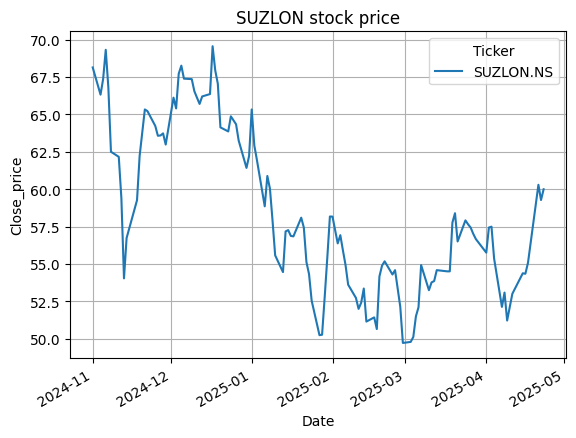

In [6]:
close = data['Close']
ax = close.plot(title = 'SUZLON stock price')
ax.set_xlabel('Date')
ax.set_ylabel('Close_price')
ax.grid()
plt.show()

In [7]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS
Date,,,,,
2024-11-01,68.139999,68.400002,67.199997,67.300003,14965199
2024-11-04,66.320000,68.239998,65.199997,68.190002,55381082
2024-11-05,67.370003,68.250000,65.529999,66.300003,45626050
2024-11-06,69.320000,69.849998,67.419998,68.000000,50008246
2024-11-07,66.800003,69.449997,66.440002,69.449997,49354800


In [8]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS
Date,,,,,
2025-04-16,54.340000,54.889999,53.849998,54.509998,34690956
2025-04-17,55.070000,55.720001,54.009998,54.330002,54279879
2025-04-21,60.290001,61.099998,55.500000,55.549999,169658526
2025-04-22,59.270000,61.580002,59.020000,60.950001,89155646
2025-04-23,59.990002,60.169998,58.130001,59.680000,97968387


In [9]:
df_clean = data.drop(index=data.index[0])

In [10]:
df_clean


Price,Close,High,Low,Open,Volume
Ticker,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS,SUZLON.NS
Date,,,,,
2024-11-04,66.320000,68.239998,65.199997,68.190002,55381082
2024-11-05,67.370003,68.250000,65.529999,66.300003,45626050
2024-11-06,69.320000,69.849998,67.419998,68.000000,50008246
2024-11-07,66.800003,69.449997,66.440002,69.449997,49354800
2024-11-08,62.500000,66.589996,61.840000,66.589996,86095752
...,...,...,...,...,...
2025-04-16,54.340000,54.889999,53.849998,54.509998,34690956
2025-04-17,55.070000,55.720001,54.009998,54.330002,54279879


In [11]:
data = data[['Close']]
dataset = data.values

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training = scaler.fit_transform(dataset)

In [13]:
x_train = []
y_train = []

for i in range(10, data_training.shape[0]):
  x_train.append(data_training[i-10:i])
  y_train.append(data_training[i,0])


In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
histoty_model_lstm = model.fit(x_train, y_train, epochs = 100, batch_size=8, verbose = 1, shuffle = False, callbacks=[early_stop])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3154
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0351
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0405
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0303
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0284
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0289
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0278
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0266
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0273
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0261
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0256
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0263
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [17]:
test_data = data_training[-10:]  # Take the last 50 data points for testing

x_test = []
y_test = dataset[data_training.shape[0] - 10:, :]  # Adjust y_test accordingly

# Ensure the loop starts with a valid index
for i in range(50, len(data_training)):
  x_test.append(data_training[i-10:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
# %%
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step


In [18]:
# ... (previous code) ...

# After generating predictions
# Take only the last 10 predictions, matching the length of 'valid'
predictions = model.predict(x_test)[-10:]
predictions = scaler.inverse_transform(predictions)

# Create the 'valid' DataFrame
valid = data[data_training.shape[0] - 10:]  # Select the last 10 data points for validation
valid['Predictions'] = predictions  # Assign predictions to the 'Predictions' column


true_values = valid['Close'].values  # True 'Close' values
predicted_values = valid['Predictions'].values  # Predicted values

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

# Calculate accuracy as 100% minus MAPE
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

# ... (rest of the code) ...

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Absolute Percentage Error (MAPE): 5.76%
Model Accuracy: 94.24%


<ipython-input-18-8c722abf97f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # Assign predictions to the 'Predictions' column


In [20]:
# --------------- Future Predictions ---------------
X_FUTURE = 7  # Predict for next 7 days
time_step = 10 # define the time_step

future_predictions = []
last_data = test_data.reshape(1, time_step, 1)

for _ in range(X_FUTURE):
    future_pred = model.predict(last_data)
    future_predictions.append(future_pred[0, 0])

    # Shift the window for the next prediction
    last_data = np.roll(last_data, shift=-1, axis=1)
    last_data[0, -1, 0] = future_pred

# Convert future predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
curr_date = data.index[-1]
from datetime import timedelta #this needs to be imported
future_dates = [curr_date + timedelta(days=i+1) for i in range(X_FUTURE)]

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Print Future Predictions
print("\nFuture Predictions for Next 7 Days:")
print(future_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<ipython-input-20-afc88d3ef423>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = future_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Future Predictions for Next 7 Days:
            Predictions
Date                   
2025-04-24    59.376312
2025-04-25    58.695683
2025-04-26    58.034615
2025-04-27    57.617897
2025-04-28    57.477619
2025-04-29    57.585499
2025-04-30    57.890354


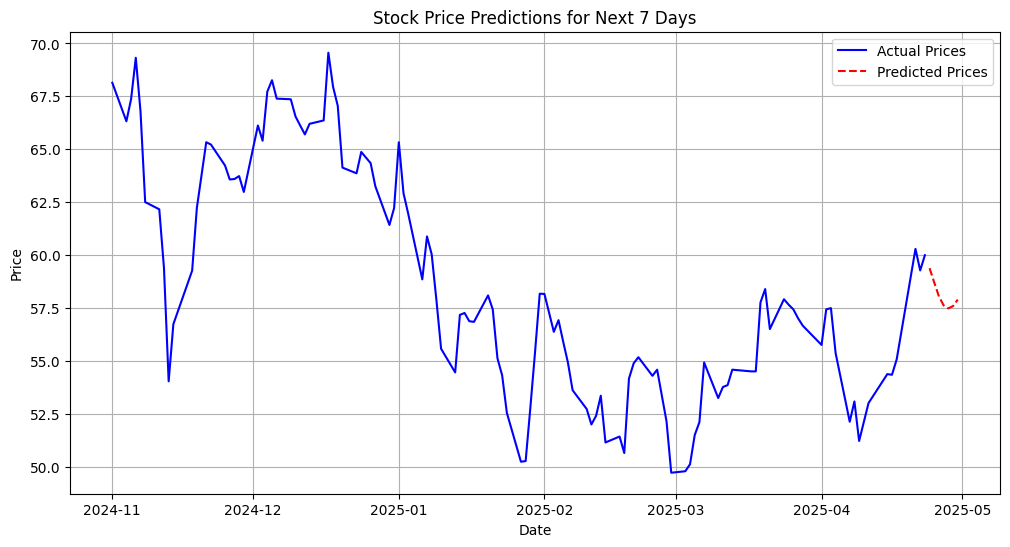

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(future_df.index, future_df['Predictions'], label='Predicted Prices', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Predictions for Next 7 Days')
plt.legend()
plt.grid(True)
plt.show()